In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width' , 'petal_length', 'petal_width' ,' species']
df = pd.read_csv(url, names = column_names)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
print("\n Features and their datatypes")
df.dtypes


 Features and their datatypes


sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
 species         object
dtype: object

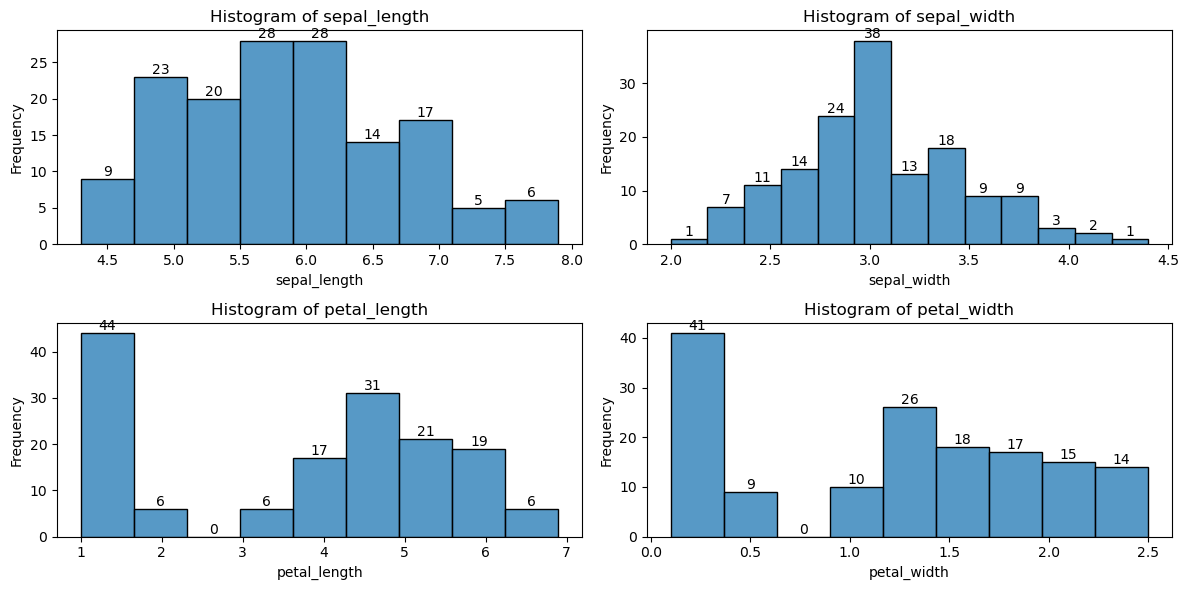

In [29]:
plt.figure(figsize=(12,6))
for i, column in enumerate (df.columns[:-1]):
    plt.subplot(2,2 ,i +1)
    ax= sns.histplot(df[column], edgecolor="black")
    plt.gca().bar_label(plt.gca().containers[0], fmt = '%d')
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

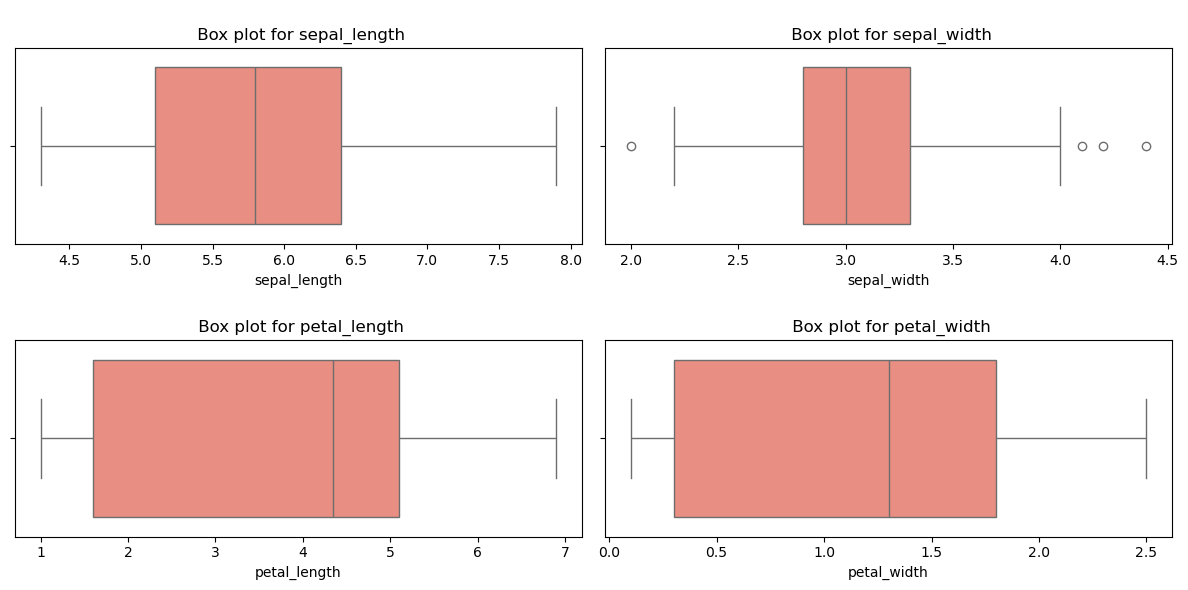

In [37]:
plt.figure(figsize = (12,6))
for i, column in enumerate(df.columns[:-1]):
    ax = plt.subplot(2,2,i+1)
    box_container = sns.boxplot(x=df[column] , ax= ax, color='salmon')
    plt.title(f"\n Box plot for {column}")
plt.tight_layout()
plt.show()


In [55]:
for column in df.columns[:-1]:
    Q1, Q3 = df[column].quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_bound, upper_bound = Q1 -1.5 * IQR , Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    if not outliers.empty:
        print(f"Ouliers for {column} ")
        print(outliers[column].values, "\n")

    else:
        print(f"No outliers for {column}\n")

    

No outliers for sepal_length

Ouliers for sepal_width 
[4.4 4.1 4.2 2. ] 

No outliers for petal_length

No outliers for petal_width



In [53]:
for feature in df.columns[:-1]:
  mean = df[feature].mean()
  median = df[feature].median()
  std = df[feature].std()
  print(f"Feature: {feature}, \nMean: {mean}, \nMedian: {median}, \nStandard Deviation: {std}")

  Q1 = df[feature].quantile(0.25)
  Q3 = df[feature].quantile(0.75)

  IQR = Q3 - Q1

  upper_bound = Q3 + 1.5*IQR
  lower_bound = Q1 - 1.5*IQR

  outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

  if not outliers.empty:
    print(f"Outliers for {feature}:")
    print(outliers[feature].values, "\n")  # Print the outlier values for each feature
  else:
    print(f"No outliers for {feature}\n")

Feature: sepal_length, 
Mean: 5.843333333333334, 
Median: 5.8, 
Standard Deviation: 0.8280661279778629
No outliers for sepal_length

Feature: sepal_width, 
Mean: 3.0540000000000003, 
Median: 3.0, 
Standard Deviation: 0.4335943113621737
Outliers for sepal_width:
[4.4 4.1 4.2 2. ] 

Feature: petal_length, 
Mean: 3.758666666666666, 
Median: 4.35, 
Standard Deviation: 1.7644204199522617
No outliers for petal_length

Feature: petal_width, 
Mean: 1.1986666666666668, 
Median: 1.3, 
Standard Deviation: 0.7631607417008414
No outliers for petal_width

